In [94]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
import IPython
from scipy import io
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm, ticker, gridspec, colors
import gen_matrix_2d as gm2
import numpy as np
import cmocean
%matplotlib inline
import myplotly as mpy

In [96]:
# Convert cmocean colormap to plotly
# https://plot.ly/python/cmocean-colorscales/
def cmocean_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = list(map(np.uint8, np.array(cmap(k*h)[:3])*255))
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

In [97]:
# Define figure size
figsize=[10,8]

# Scientific notation format
# From: http://stackoverflow.com/questions/25983218/scientific-notation-colorbar-in-matplotlib
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

In [98]:
# Load data
data = pd.read_hdf('conv/conv_large.hdf')

# Remove failed methods
data = data[data['info']==0]

# Extract classes
krylov = data[data['class']=='krylov']
direct = data[data['class']=='direct']

# Import solution vectors
sol = h5py.File('conv/conv_large_sol.hdf5','r')

# Determine number of spatial & angular resolutions used in trials
nsg = len(np.unique([key.split('x')[0] for key in sol.keys()]))
nag = len(np.unique([key.split('x')[1] for key in sol.keys()]))

In [99]:
np.unique([key.split('x')[0] for key in sol.keys()])

array(['100', '20', '40', '60', '80'], 
      dtype='<U3')

In [100]:
np.unique([key.split('x')[1] for key in sol.keys()])

array(['100', '20', '40', '60', '80'], 
      dtype='<U3')

In [101]:
# List of matrix sizes
list(sol.keys())

['100x100',
 '100x20',
 '100x40',
 '100x60',
 '100x80',
 '20x100',
 '20x20',
 '20x40',
 '20x60',
 '20x80',
 '40x100',
 '40x20',
 '40x40',
 '40x60',
 '40x80',
 '60x100',
 '60x20',
 '60x40',
 '60x60',
 '60x80',
 '80x100',
 '80x20',
 '80x40',
 '80x60',
 '80x80']

In [102]:
# Show a subset of data table
ns=40
nth=40
whichrows = np.logical_and.reduce([
    data['info']==0,
    data['nx']==ns,
    data['ny']==ns,
   data['nth']==nth
])
data[whichrows]

,nx,ny,nth,mat_size,class,method,info,start_time,end_time,dt
1,40.0,40.0,40.0,64000.0,krylov,lgmres,0.0,1.494509e+09,1.494509e+09,2.786218


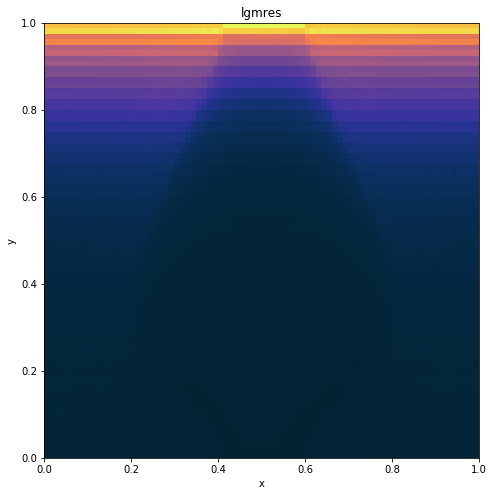

In [103]:
# Compare irradiance plots for two different methods
ns = 80
nth = 80
method_list = ['lgmres']
for method in method_list:
    plt.figure(figsize=figsize)
    gm2.plot_irrad(
        sol['{}x{}'.format(ns,nth)][method][:],
        var_lengths=[ns,ns,nth],
        var_order=[2,1,0],
        title=method,
        cmap=cmocean.cm.thermal
    )

In [104]:
#sol.close()

In [105]:
# fig = plt.figure(figsize=[10,6])
# ax = plt.gca()
# srtd = stat_it.sort_values('mat_size')
# srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
# ax.set_yscale('log')
# plt.xlabel('Matrix size (m=n)')
# plt.ylabel('Log time to converge (log s)')
# plt.title('Convergence times: Stationary iterative methods')
# plt.legend([v[0] for v in srtd.groupby('method')['method']])
# plt.savefig('plots/stat_it_dt_log.png')
# 
# fig = plt.figure(figsize=[10,6])
# ax = plt.gca()
# srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
# plt.xlabel('Matrix size (m=n)')
# plt.ylabel('Time to converge (s)')
# plt.title('Convergence times: Stationary iterative methods')
# plt.legend([v[0] for v in srtd.groupby('method')['method']])
# plt.savefig('plots/stat_it_dt.png')

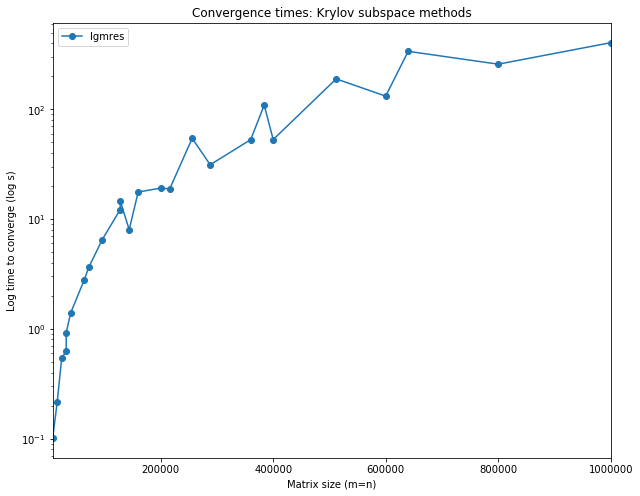

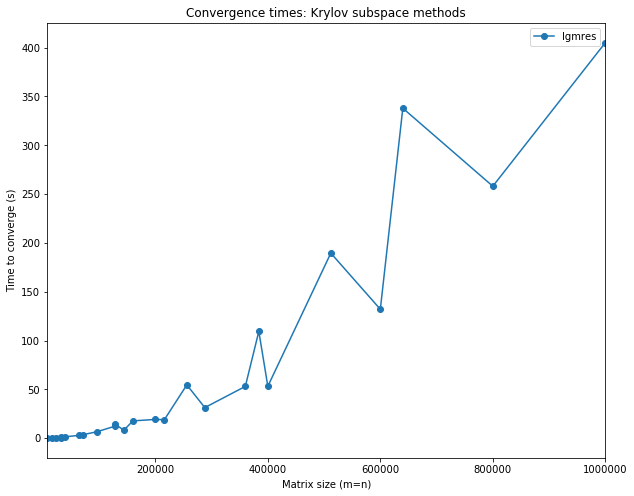

In [106]:
fig = plt.figure(figsize=figsize)
ax = plt.gca()
srtd = krylov.sort_values('mat_size')
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
ax.set_yscale('log')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Log time to converge (log s)')
plt.title('Convergence times: Krylov subspace methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/krylov_dt_log.png')

fig = plt.figure(figsize=figsize)
ax = plt.gca()
srtd.groupby('method').plot(x='mat_size',y='dt',ax=ax,marker='o')
plt.xlabel('Matrix size (m=n)')
plt.ylabel('Time to converge (s)')
plt.title('Convergence times: Krylov subspace methods')
plt.legend([v[0] for v in srtd.groupby('method')['method']])
plt.savefig('plots/krylov_dt.png')

In [107]:
# Isolate LGMRES results
(
    krylov
    [krylov['method']=='lgmres']
    .sort_values(['nx','nth'])
)



,nx,ny,nth,mat_size,class,method,info,start_time,end_time,dt
0,20.0,20.0,20.0,8000.0,krylov,lgmres,0.0,1.494509e+09,1.494509e+09,0.101223
3,20.0,20.0,40.0,16000.0,krylov,lgmres,0.0,1.494509e+09,1.494509e+09,0.214718
24,20.0,20.0,60.0,24000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,0.540268
23,20.0,20.0,80.0,32000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,0.918446
22,20.0,20.0,100.0,40000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,1.398858
2,40.0,40.0,20.0,32000.0,krylov,lgmres,0.0,1.494509e+09,1.494509e+09,0.625719
1,40.0,40.0,40.0,64000.0,krylov,lgmres,0.0,1.494509e+09,1.494509e+09,2.786218
21,40.0,40.0,60.0,96000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,6.489171
20,40.0,40.0,80.0,128000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,12.208212
19,40.0,40.0,100.0,160000.0,krylov,lgmres,0.0,1.494511e+09,1.494511e+09,17.645925


In [108]:
# Extract dt values for lgmres to 2d array
# Indexed by [ns,na]
dt_grid = (
    krylov
    [krylov['method']=='lgmres']
    .sort_values(['nx','nth'])
    ['dt']
    .values
    .reshape([nsg,nag])
)

# Create meshgrids for ns, na
ns_list = np.sort(np.unique(krylov['nx']))
na_list = np.sort(np.unique(krylov['nth']))
ns_grid,na_grid = np.meshgrid(ns_list,na_list,indexing='ij')

(11.990143369175627,
 108.00985663082439,
 11.987352832965417,
 112.01264716703457)

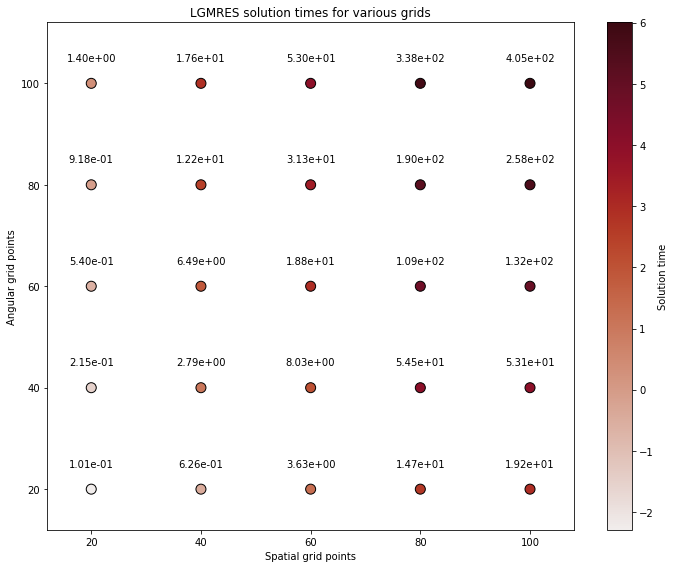

In [109]:
cmap = cmocean.cm.amp

plt.figure(figsize=figsize)
#plt.contour(ns_grid,na_grid,np.log(dt_grid),cmap=cmap)
plt.scatter(ns_grid,na_grid,c=np.log(dt_grid),
            cmap=cmap,edgecolor='k',s=100)
plt.colorbar(label='Solution time')
plt.xlabel('Spatial grid points')
plt.ylabel('Angular grid points')
plt.title('LGMRES solution times for various grids')

# Add text above dots
vshift = max(na_list)/25
for ii in range(nsg):
    ns = ns_list[ii]
    for jj in range(nag):
        na = na_list[jj]
        dt = dt_grid[ii][jj]
        plt.text(ns,na+vshift,'{:.2e}'.format(dt),ha='center',va='bottom')

plt.tight_layout()

plot_margin = vshift

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin * 2))

In [110]:
# Same as above, but Plotly surface plot
mpy.surf(ns_grid**2,na_grid,dt_grid)#,colorscale=cmocean_to_plotly(cmocean.cm.amp,ns_grid.size))

In [111]:
# Create list of lists from solutions for method
# method_name is the string identifying the method
# sol is a dict-like object containing the solution
# sol is indexed by matrix name, then method name
def method_to_grid(method_name,sol,ns_list,na_list):
    # Determine nsg, nag
    nsg = len(ns_list)
    nag = len(na_list)
    
    grid = []
    for ii in range(nsg):
        grid.append([])
        for jj in range(nag):
            grid[ii].append(sol['{:.0f}x{:.0f}'
                                .format(ns_list[ii],na_list[jj])]
                                [method_name]
                                [:]
                           )
    return grid

In [112]:
# Create grid of plots for a particular method
# qq = radiance quantity to plot (2D array of shape (ns,na))
def irrad_grid(qq,ns_list,na_list,method,var_order=[2,1,0],
               cmap=cmocean.cm.thermal,title=None):
    
    # Determine nsg, nag
    nsg = len(ns_list)
    nag = len(na_list)
    
    # Axis grid
    # Use GridSpec to allow margins to be adjusted nicely
    # without title overlapping column labels
    # See: http://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-subtitle
    
    fig = plt.figure(figsize=[12,12.5])
    gs = gridspec.GridSpec(nsg,nag)
    ax_list = [fig.add_subplot(ss) for ss in gs]
    
    # Font size for row & column labels
    fs = 20
    
    # Axes counter
    kk = 0
    for ii in range(nsg):
        ns = int(ns_list[ii])
        for jj in range(nag):
            na = int(na_list[jj])
            var_lengths = [ns,ns,na]
            
            # Row & Column labels
            if jj == 0:
                ylabel = 'NS = {}'.format(ns)
            else:
                ylabel = ''
            if ii == nsg-1:
                xlabel = 'NA = {}'.format(na)
            else:
                xlabel = ''
            
            title = ''
            
            plt.sca(ax_list[kk])
            gm2.plot_irrad(qq[ii][jj],var_lengths,var_order,cmap=cmap,
                cbar_kwargs=dict(
                    format=ticker.FuncFormatter(fmt)))
            
            ax_list[kk].set_xlabel(xlabel,fontsize=fs)
            ax_list[kk].set_ylabel(ylabel,fontsize=fs)
            ax_list[kk].set_title(title,fontsize=fs)
            
            ax_list[kk].set_xticks([])
            ax_list[kk].set_yticks([])
            
            
            # Increment axes counter
            kk += 1
            
    # Figure title
    plt.suptitle('{} Convergence Grid'.format(method),fontsize=fs+4)


    plt.subplots_adjust()

    # Reduce margins
    #gs.tight_layout(fig, rect=[0,0,1,1])
    gs.tight_layout(fig, rect=[0,0,1,0.95])


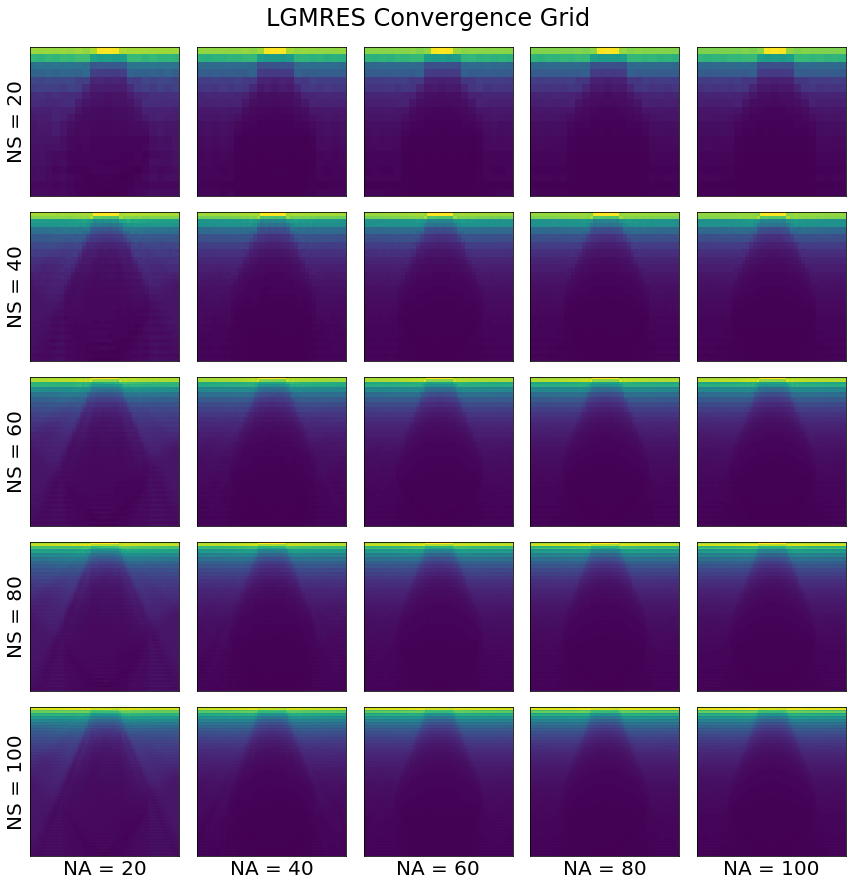

In [126]:
g=method_to_grid('lgmres',sol,ns_list,na_list)
irrad_grid(g,ns_list,na_list,'LGMRES',cmap=cm.viridis)

## MAKE SURE THESE USE THE SAME COLOR SCALE & INCLUDE COLORBAR ##

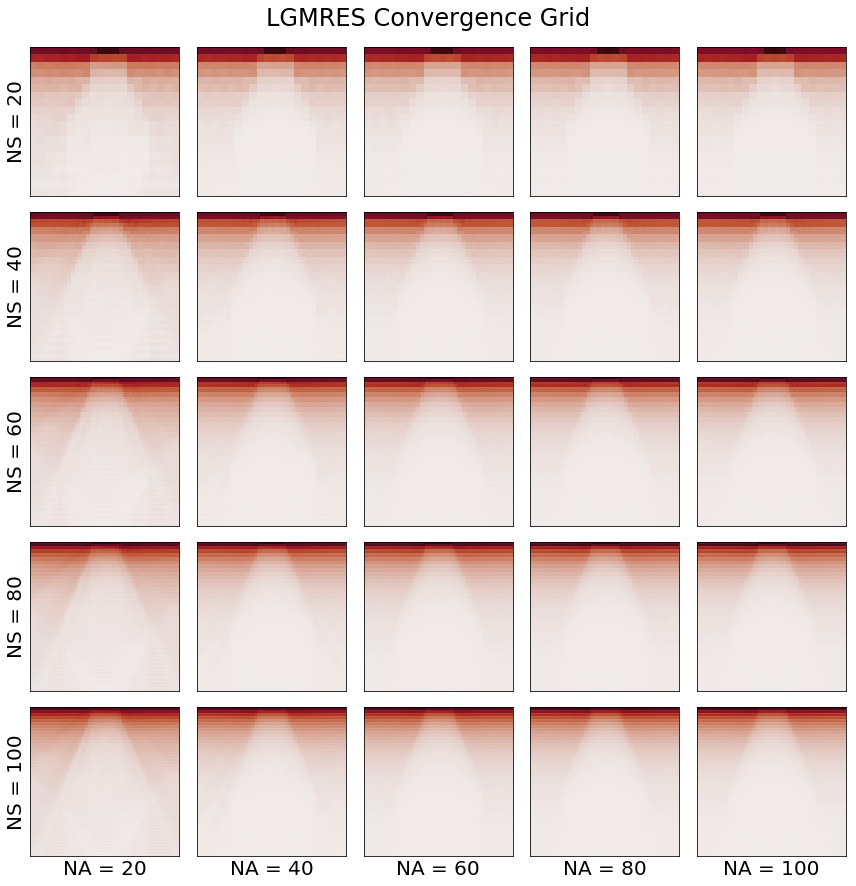

In [121]:
g=method_to_grid('lgmres',sol,ns_list,na_list)
irrad_grid(g,ns_list,na_list,'LGMRES',cmap=cmocean.cm.amp)

## MAKE SURE THESE USE THE SAME COLOR SCALE & INCLUDE COLORBAR ##

In [122]:
# Load error data
max_err_dct = io.loadmat('../mat/conv/max_error.mat')
max_err = max_err_dct['max_err']

(11.211469534050178,
 108.78853046594982,
 10.988226637233257,
 113.01177336276672)

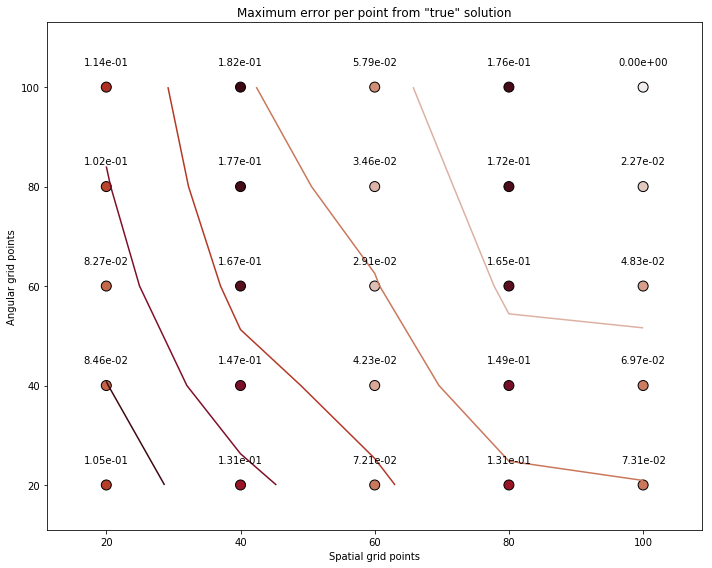

In [127]:
cmap = cmocean.cm.amp
cmap1 = cmocean.cm.amp_r

plt.figure(figsize=figsize)
plt.contour(ns_grid,na_grid,np.log(dt_grid),cmap=cmap1)
plt.scatter(x=ns_grid,y=na_grid,c=max_err[:,:],
            cmap=cmap,edgecolor='k',s=100)
#plt.colorbar(label='Error')
plt.xlabel('Spatial grid points')
plt.ylabel('Angular grid points')
plt.title('Maximum error per point from "true" solution')

# Add text above dots
vshift = max(na_list)/25
for ii in range(nsg):
    ns = ns_list[ii]
    for jj in range(nag):
        na = na_list[jj]
        dt = dt_grid[ii][jj]
        plt.text(ns,na+vshift,'{:.2e}'.format(max_err[ii][jj]),ha='center',va='bottom')

plt.tight_layout()

plot_margin = vshift

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin * 2))

In [129]:
mpy.surf(ns_grid,na_grid,max_err[:-1,:-1])

In [130]:
# Load error data
avg_err_dct = io.loadmat('../mat/conv/avg_error.mat')
avg_err = avg_err_dct['avg_err']

(11.211469534050178,
 108.78853046594982,
 10.988226637233257,
 113.01177336276672)

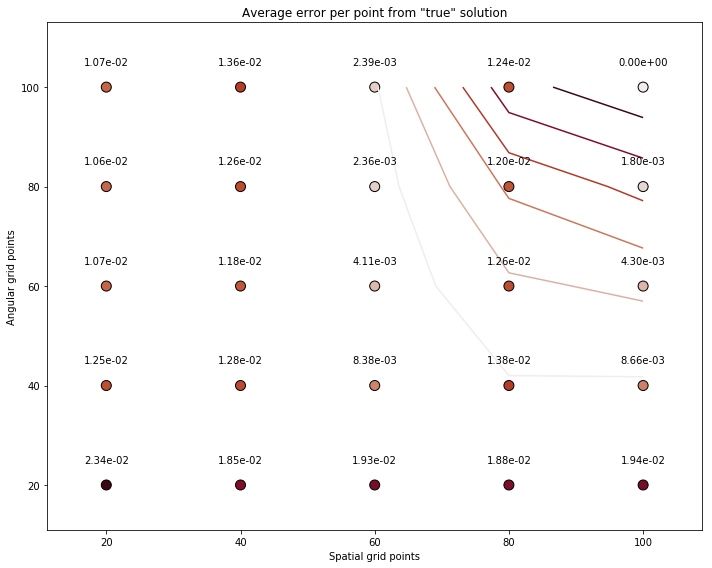

In [135]:
cmap = cmocean.cm.amp

plt.figure(figsize=figsize)
plt.contour(ns_grid,na_grid,dt_grid,cmap=cmap)
plt.scatter(x=ns_grid,y=na_grid,c=avg_err,
            cmap=cmap,edgecolor='k',s=100)
#plt.colorbar(label='Error')
plt.xlabel('Spatial grid points')
plt.ylabel('Angular grid points')
plt.title('Average error per point from "true" solution')

# Add text above dots
vshift = max(na_list)/25
for ii in range(nsg):
    ns = ns_list[ii]
    for jj in range(nag):
        na = na_list[jj]
        dt = dt_grid[ii][jj]
        plt.text(ns,na+vshift,'{:.2e}'.format(avg_err[ii][jj]),ha='center',va='bottom')

plt.tight_layout()

plot_margin = vshift

x0, x1, y0, y1 = plt.axis()
plt.axis((x0 - plot_margin,
          x1 + plot_margin,
          y0 - plot_margin,
          y1 + plot_margin * 2))

In [119]:
mpy.surf(ns_grid,na_grid,avg_err[:-1,:-1])